<a href="https://colab.research.google.com/github/Dianaj30/Predicciones/blob/main/Proyecto1_Parte5_Diana_Cotrina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROYECTO:
Predicción de ventas para productos alimenticios que se venden en distintas tiendas.

## SECCIÓN 1: CARGADO DE DATOS##

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/CODING DOJO-BOOTCAMP DATA ANALYTICS/MODULO I/Ejercicios plataforma Coding/sales_predictions.csv")
df.head(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


Cambio de nombre a las columnas para poder visualizar y manipular mejor los datos

In [ ]:
df.rename(columns = {'Item_Identifier' : 'item_id',
                   'Item_Weight' : 'item_w',
                   'Item_Fat_Content' : 'item_fat',
                   'Item_Visibility' : 'item_visib',
                   'Item_Type' : 'item_type',
                   'Item_MRP' : 'intem_mrp',
                   'Outlet_Identifier' : 'outlet_id',
                   'Outlet_Establishment_Year' : 'outlet_establish_year',
                   'Outlet_Size' : 'outlet_size',
                   'Outlet_Location_Type' : 'oulet_location_type',
                   'Outlet_Type' : 'outlet_type',
                   'Item_Outlet_Sales' : 'item_outlet_sales'},
          inplace = True)
df.head()

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


##SECCIÓN 2: EXPLORACIÓN DE DATOS##

1. Conocer los valores y tipos de datos

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8523 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8523 non-null   object 
 3   item_visib             8523 non-null   float64
 4   item_type              8523 non-null   object 
 5   intem_mrp              8523 non-null   float64
 6   outlet_id              8523 non-null   object 
 7   outlet_establish_year  8523 non-null   int64  
 8   outlet_size            6113 non-null   object 
 9   oulet_location_type    8523 non-null   object 
 10  outlet_type            8523 non-null   object 
 11  item_outlet_sales      8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Se observa que faltan valores en la columna item_w y oulet size

2. Conocer los valores nulos

In [ ]:
df.isnull().sum()

item_id                     0
item_w                   1463
item_fat                    0
item_visib                  0
item_type                   0
intem_mrp                   0
outlet_id                   0
outlet_establish_year       0
outlet_size              2410
oulet_location_type         0
outlet_type                 0
item_outlet_sales           0
dtype: int64

Faltan 1463 valores en la columna item _w y 2410 en la columna *outlet_size*

3. Características descriptivas para ver como se comportan los datos

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
item_w,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
item_visib,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
intem_mrp,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
outlet_establish_year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
item_outlet_sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


2. Revisión 'item_id'

In [ ]:
df['item_id'].value_counts()

item_id
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64

Se observa que hay 1559 valores únicos

3. Revisión 'item_w'

In [ ]:
df['item_w'].value_counts()

item_w
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [ ]:
df['item_w'].isnull().sum()

1463

Como se había indicado anteriormente existen 1463 valores nulos en el 'item_w'. Sin embargo, como existe la variable 'item_id' que equivale a la identificación del producto, eso nos lleva a la conclusión que por cada id ( cada producto) hay un único peso. Asi que se imputarían los valores de los pesos faltantes de acuerdo al id del producto.

##IMPUTACIÓN DE VALORES A LOS NULOS##

Comprobar la hipóstesis anterior. Ver cabecera de las columnas item_id e item_w. y ordenarlo en base a la columna item_id

In [ ]:
df[['item_id','item_w']].sort_values(by='item_id').head(30)

,item_id,item_w
8043,DRA12,11.600
118,DRA12,11.600
1693,DRA12,11.600
1197,DRA12,11.600
1245,DRA12,11.600
7467,DRA12,11.600
8195,DRA24,19.350
6863,DRA24,19.350
2879,DRA24,NaN
4416,DRA24,NaN


Se observa que por cada ID del producto corresponde un solo peso y en algunos casos hay valores faltantes que podemos completar usando la tabla de id.

##APLICACION MERCE##

1. Generar dataframe para merge (para merge se debe tener dos tablas, por esa se está generando un nuevo dataframe)

In [ ]:
df_w=df.groupby(['item_id'])[['item_w']].max().reset_index()
df_w.rename(columns = {'item_w' : 'item_w_new'},inplace = True)
df_w

,item_id,item_w_new
0,DRA12,11.600
1,DRA24,19.350
2,DRA59,8.270
3,DRB01,7.390
4,DRB13,6.115
...,...,...
1554,NCZ30,6.590
1555,NCZ41,19.850
1556,NCZ42,10.500
1557,NCZ53,9.600


2. Desarrollo del Merge y la tabla está ordenada según 'item_id'

In [ ]:
df_new = pd.merge(left=df, right=df_w, left_on='item_id', right_on='item_id', how='inner')
df_new.sort_values(by='item_id').head(20)

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales,item_w_new
680,DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,2009,Medium,Tier 3,Supermarket Type2,850.8924,11.60
678,DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,1987,High,Tier 3,Supermarket Type1,2552.6772,11.60
677,DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.6154,OUT045,2002,NaN,Tier 2,Supermarket Type1,3829.0158,11.60
676,DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772,11.60
681,DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,1998,NaN,Tier 3,Grocery Store,283.6308,11.60
679,DRA12,11.60,LF,0.000000,Soft Drinks,141.9154,OUT035,2004,Small,Tier 2,Supermarket Type1,992.7078,11.60
4801,DRA24,19.35,Regular,0.066832,Soft Drinks,163.8868,OUT010,1998,NaN,Tier 3,Grocery Store,327.5736,19.35
4805,DRA24,19.35,Regular,0.039895,Soft Drinks,162.4868,OUT013,1987,High,Tier 3,Supermarket Type1,4422.2436,19.35
4804,DRA24,19.35,Regular,0.039990,Soft Drinks,165.0868,OUT049,1999,Medium,Tier 1,Supermarket Type1,982.7208,19.35
4800,DRA24,NaN,Regular,0.069909,Soft Drinks,163.2868,OUT019,1985,Small,Tier 1,Grocery Store,491.3604,19.35


In [ ]:
df_new.isnull().sum()

item_id                     0
item_w                   1463
item_fat                    0
item_visib                  0
item_type                   0
intem_mrp                   0
outlet_id                   0
outlet_establish_year       0
outlet_size              2410
oulet_location_type         0
outlet_type                 0
item_outlet_sales           0
item_w_new                  4
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8523 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8523 non-null   object 
 3   item_visib             8523 non-null   float64
 4   item_type              8523 non-null   object 
 5   intem_mrp              8523 non-null   float64
 6   outlet_id              8523 non-null   object 
 7   outlet_establish_year  8523 non-null   int64  
 8   outlet_size            6113 non-null   object 
 9   oulet_location_type    8523 non-null   object 
 10  outlet_type            8523 non-null   object 
 11  item_outlet_sales      8523 non-null   float64
 12  item_w_new             8519 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 865.7+ KB


Se observa que los valores nulos se redujeron a 4 nada más. Para poder saber si se eliminan o no, se hará el porcentaje para ver cuanto representa del valor total

Analizando los valores perdidos

In [ ]:
df_new.isna().sum()/df.shape[0]*100

item_id                   0.000000
item_w                   17.165317
item_fat                  0.000000
item_visib                0.000000
item_type                 0.000000
intem_mrp                 0.000000
outlet_id                 0.000000
outlet_establish_year     0.000000
outlet_size              28.276428
oulet_location_type       0.000000
outlet_type               0.000000
item_outlet_sales         0.000000
item_w_new                0.046932
dtype: float64

Los items nulos representan el 0.04%, menos del 10% por lo que se pueden eliminar.

In [ ]:
df_new_nulos=df_new[df_new['item_w_new'].isna()]
df_new_nulos

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales,item_w_new
4125,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,NaN
6440,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,NaN
8278,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,NaN
8463,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,NaN


Eliminación de valores nulos en df_new

In [ ]:
df_new.drop([4125,6440,8278,8463], axis=0, inplace=True)
df_new

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales,item_w_new
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCF55,6.675,LF,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675
8519,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210
8520,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210
8521,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250


In [ ]:
df_new.isnull().sum()

item_id                     0
item_w                   1459
item_fat                    0
item_visib                  0
item_type                   0
intem_mrp                   0
outlet_id                   0
outlet_establish_year       0
outlet_size              2410
oulet_location_type         0
outlet_type                 0
item_outlet_sales           0
item_w_new                  0
dtype: int64

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8519 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8519 non-null   object 
 3   item_visib             8519 non-null   float64
 4   item_type              8519 non-null   object 
 5   intem_mrp              8519 non-null   float64
 6   outlet_id              8519 non-null   object 
 7   outlet_establish_year  8519 non-null   int64  
 8   outlet_size            6109 non-null   object 
 9   oulet_location_type    8519 non-null   object 
 10  outlet_type            8519 non-null   object 
 11  item_outlet_sales      8519 non-null   float64
 12  item_w_new             8519 non-null   float64
dtypes: float64(5), int64(1), object(7)
memory usage: 931.8+ KB


##Revisión 'outlet_size'##





1. Conocer los valores únicos

In [ ]:
df_new['outlet_size'].value_counts()

outlet_size
Medium    2790
Small     2387
High       932
Name: count, dtype: int64

Existen tres tipos de tiendas "Medium", "Small", "High"

2. Conocer los valores nulos

In [ ]:
df_new['outlet_size'].isnull().sum()

2410

Existen 2410 valores pedidos en el tamaño de tienda

3. Búsqueda de valores perdidos, poder saber dónde se encuentran

In [ ]:
outlet_size_nulos=df[df['outlet_size'].isna()]
outlet_size_nulos

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


Se observa que hay una relación entre los tipos de tienda y los valores nulos, por ello se los agrupará para observar a que tamaño de tiendan pertenecen cada uno de ellos.

4. Realización del groupby

In [ ]:
df_new_size=df_new.groupby(['outlet_type', 'oulet_location_type','outlet_size'])[['item_outlet_sales']].mean()
df_new_size

item_outlet_sales
outlet_type       oulet_location_type outlet_size                   
Grocery Store     Tier 1              Small               340.746838
Supermarket Type1 Tier 1              Medium             2348.354635
                                      Small              2277.844267
                  Tier 2              Small              2438.841866
                  Tier 3              High               2298.995256
Supermarket Type2 Tier 3              Medium             1995.498739
Supermarket Type3 Tier 3              Medium             3695.781505

En base a este análisis se observa lo siguiente:
1. Grocery store Tier1 solo tiene el tamaño 'Small"
2. Supermarket Type1 Tier2 su tamaño es 'Small'
4. Supermarket Type1 Tier3 su tamaño es 'High'
5. Supermarket Type2 Tier3 su tamaño es 'Midium'
6. Supermarket Type3 Tier3 su tamaño es 'Medium'

5. Realización de iteracion con for para reemplazar los valores

In [ ]:
for index,row in df_new.iterrows():
  if(row['outlet_type']=='Grocery Store') and (row['oulet_location_type']=='Tier 1'):
    df_new.at[index,"outlet_size_new"] = 'Small'
  elif (row['outlet_type']=='Supermarket Type1') and (row['oulet_location_type']=='Tier 2'):
    df_new.at[index,"outlet_size_new"] ='Small'
  elif (row['outlet_type']=='Supermarket Type1') and (row['oulet_location_type']=='Tier 3'):
    df_new.at[index,"outlet_size_new"] ='High'
  elif (row['outlet_type']=='Supermarket Type2') and (row['oulet_location_type']=='Tier 3'):
    df_new.at[index,"outlet_size_new"] ='Medium'
  elif (row['outlet_type']=='Supermarket Type3') and (row['oulet_location_type']=='Tier 3'):
    df_new.at[index,"outlet_size_new"] ='Medium'
  else:
    df_new.at[index,"outlet_size_new"] = row['outlet_size']

6. Revisión de valores nulos

In [ ]:
df_new['outlet_size'].isnull().sum()

2410

In [ ]:
df_new['outlet_size_new'].isnull().sum()

555

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8519 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8519 non-null   object 
 3   item_visib             8519 non-null   float64
 4   item_type              8519 non-null   object 
 5   intem_mrp              8519 non-null   float64
 6   outlet_id              8519 non-null   object 
 7   outlet_establish_year  8519 non-null   int64  
 8   outlet_size            6109 non-null   object 
 9   oulet_location_type    8519 non-null   object 
 10  outlet_type            8519 non-null   object 
 11  item_outlet_sales      8519 non-null   float64
 12  item_w_new             8519 non-null   float64
 13  outlet_size_new        7964 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.2+ MB


Se observa que ahora hay 555 valores perdidos, ya no 2410.

7. Búsqueda de valores nulos

In [ ]:
outlet_size_new_nulos=df_new[df_new['outlet_size_new'].isna()]
outlet_size_new_nulos

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales,item_w_new,outlet_size_new
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300,NaN
15,FDN15,17.500,Low Fat,0.028009,Meat,141.7180,OUT010,1998,NaN,Tier 3,Grocery Store,419.4540,17.500,NaN
21,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,19.200,NaN
28,NCD19,8.930,Low Fat,0.022060,Household,56.0614,OUT010,1998,NaN,Tier 3,Grocery Store,276.3070,8.930,NaN
38,FDO10,13.650,Regular,0.021344,Snack Foods,58.3588,OUT010,1998,NaN,Tier 3,Grocery Store,114.5176,13.650,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8394,NCP17,19.350,Low Fat,0.000000,Health and Hygiene,65.3168,OUT010,1998,NaN,Tier 3,Grocery Store,191.7504,19.350,NaN
8462,NCA18,10.100,Low Fat,0.093862,Household,115.9492,OUT010,1998,NaN,Tier 3,Grocery Store,231.6984,10.100,NaN
8478,FDP15,15.200,Low Fat,0.000000,Meat,256.0330,OUT010,1998,NaN,Tier 3,Grocery Store,1281.6650,15.200,NaN
8482,NCD55,14.000,Low Fat,0.040725,Household,43.4454,OUT010,1998,NaN,Tier 3,Grocery Store,41.9454,14.000,NaN


In [ ]:
df_new['outlet_id'].value_counts()

outlet_id
OUT013    932
OUT027    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: count, dtype: int64

El supuesto es que el 'outlet_id' OUT010 tiene los 555 valores faltantes, es decir en ese outlet nunca se registró el tamaño.

8. Para comprobar la hipótesis se hará una búsqueda del tamaño de tienda por 'outlet_id'

In [ ]:
df_new_id_outlet=df_new.groupby(['outlet_id','outlet_type','oulet_location_type'])[['outlet_size_new']].count()
df_new_id_outlet

,,,outlet_size_new
outlet_id,outlet_type,oulet_location_type,
OUT010,Grocery Store,Tier 3,0
OUT013,Supermarket Type1,Tier 3,932
OUT017,Supermarket Type1,Tier 2,926
OUT018,Supermarket Type2,Tier 3,928
OUT019,Grocery Store,Tier 1,527
OUT027,Supermarket Type3,Tier 3,932
OUT035,Supermarket Type1,Tier 2,930
OUT045,Supermarket Type1,Tier 2,929
OUT046,Supermarket Type1,Tier 1,930


Acá comprobamos la hipótesis que los valores faltantes corresponden a la tienda con id OUT010

Debido a que es una tienda completa no correspondería eliminarla, porque se requiere analizar el nivel de predicción de ventas de las tiendas.

Ahora hacemos un análisis del promedio de ventas por tienda y es bastante variado, entonces no se elimina.

In [ ]:
df_new_id_outlet_sales=df_new.groupby(['outlet_id','outlet_type','oulet_location_type'])[['item_outlet_sales']].mean()
df_new_id_outlet_sales

,,,item_outlet_sales
outlet_id,outlet_type,oulet_location_type,
OUT010,Grocery Store,Tier 3,339.351662
OUT013,Supermarket Type1,Tier 3,2298.995256
OUT017,Supermarket Type1,Tier 2,2340.675263
OUT018,Supermarket Type2,Tier 3,1995.498739
OUT019,Grocery Store,Tier 1,340.746838
OUT027,Supermarket Type3,Tier 3,3695.781505
OUT035,Supermarket Type1,Tier 2,2438.841866
OUT045,Supermarket Type1,Tier 2,2192.384798
OUT046,Supermarket Type1,Tier 1,2277.844267


Ahora analizamos el promedio de ventas por tamaño de tienda para ver si se puede eliminar la columna de tamaño de tienda

In [ ]:
df_new_size_sales=df_new.groupby(['outlet_size_new'])[['item_outlet_sales']].mean()
df_new_size_sales

,item_outlet_sales
outlet_size_new,
High,2298.995256
Medium,2681.097134
Small,2067.487614


Se observa que no hay mucha variación entre el tamaño de tienda

Para comprobar la hipótesis se verá la desviación estándar

In [ ]:
df_new_size_desv= {'outlet_size': ['High', 'Medium', 'Small'],
        'item_outlet_sales': [10256.6490, 13086.9648, 9779.9362]}
df_new_size_desv = pd.DataFrame(df_new_size_desv)

In [ ]:
df_new_size_desv.describe()

,item_outlet_sales
count,3.000000
mean,11041.183333
std,1787.660519
min,9779.936200
25%,10018.292600
50%,10256.649000
75%,11671.806900
max,13086.964800


Se observa que la desviación estándar si es alta, se buscará otras comparaciones para ver si se puede o no eliminar la tamaño de tienda.

Ahora vamos a revisar si hay variación por id, localización y tipo. Se observa que la variación es mucho mayor en comparación con la variación del tamaño de tienda.

In [ ]:
df_new_sales_id_outlet=df_new.groupby(['outlet_id','outlet_type','oulet_location_type'])[['item_outlet_sales']].mean()
df_new_sales_id_outlet

,,,item_outlet_sales
outlet_id,outlet_type,oulet_location_type,
OUT010,Grocery Store,Tier 3,339.351662
OUT013,Supermarket Type1,Tier 3,2298.995256
OUT017,Supermarket Type1,Tier 2,2340.675263
OUT018,Supermarket Type2,Tier 3,1995.498739
OUT019,Grocery Store,Tier 1,340.746838
OUT027,Supermarket Type3,Tier 3,3695.781505
OUT035,Supermarket Type1,Tier 2,2438.841866
OUT045,Supermarket Type1,Tier 2,2192.384798
OUT046,Supermarket Type1,Tier 1,2277.844267


Al analizar el promedio de ventas por tipo de tienda y localización, se observa que el tipo de tienda "Grovery Store" ubicada en Tier3 tiene un promedio de ventas de 339.35. Mientras que tienda la tienda"Grovery Store" ubicada en Tier1 tiene 340.74. La diferencia del promedio de ventas de ambas tiendas es 1.39. Un valor bastante bajo, es decir, no hay tanto variación si comparamos que los otros promedios de ventas.

Anteriormente habiamos observado que la tienda "Grovery Store" ubicada en Tier1 solo tiene una asignación de tamaño que es "Small". Por lo que, se podría asignar el tamaño "Small" a las tiendas "Grocery Store" Tier3 ya que su promedio de ventas es bastante similar.

Asignación de "Small" a los valores faltantes en tipo de tiendas por la razon antes expuesta

In [ ]:
df_new['outlet_size_new'].fillna('Small', inplace=True)
df_new

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales,item_w_new,outlet_size_new
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,9.300,Medium
1,FDA15,9.300,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208,9.300,Small
2,FDA15,9.300,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392,9.300,Small
3,FDA15,9.300,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208,9.300,Medium
4,FDA15,9.300,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184,9.300,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,NCF55,6.675,LF,0.021666,Household,33.3874,OUT046,1997,Small,Tier 1,Supermarket Type1,1235.0590,6.675,Small
8519,NCW30,5.210,Low Fat,0.011072,Household,257.8962,OUT017,2007,NaN,Tier 2,Supermarket Type1,4402.9354,5.210,Small
8520,NCW30,5.210,Low Fat,0.011008,Household,259.5962,OUT035,2004,Small,Tier 2,Supermarket Type1,2848.9582,5.210,Small
8521,NCW05,20.250,Low Fat,0.148303,Health and Hygiene,108.3938,OUT049,1999,Medium,Tier 1,Supermarket Type1,2787.0388,20.250,Medium


In [ ]:
df_new_size_sales_new=df_new.groupby(['outlet_size'])[['item_outlet_sales']].mean()
df_new_size_sales_new

,item_outlet_sales
outlet_size,
High,2298.995256
Medium,2681.097134
Small,1912.899743


Nuevo promedio de ventas si se imputa "Small" a la tienda Grocery Store Tier3. El nuevo promedio es 1912.14, el anterior era 2067.028. La diferencia es de 155 aprox. La diferencia es menor en comparación si se eliminaba la columna entera de tamaño de tienda. Donde habia una diferencia de 383 a 614 entre tamaño de tiendas.

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8519 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8519 non-null   object 
 3   item_visib             8519 non-null   float64
 4   item_type              8519 non-null   object 
 5   intem_mrp              8519 non-null   float64
 6   outlet_id              8519 non-null   object 
 7   outlet_establish_year  8519 non-null   int64  
 8   outlet_size            6109 non-null   object 
 9   oulet_location_type    8519 non-null   object 
 10  outlet_type            8519 non-null   object 
 11  item_outlet_sales      8519 non-null   float64
 12  item_w_new             8519 non-null   float64
 13  outlet_size_new        8519 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df_new.isnull().sum()

item_id                     0
item_w                   1459
item_fat                    0
item_visib                  0
item_type                   0
intem_mrp                   0
outlet_id                   0
outlet_establish_year       0
outlet_size              2410
oulet_location_type         0
outlet_type                 0
item_outlet_sales           0
item_w_new                  0
outlet_size_new             0
dtype: int64

En conclusión:
Solo se eliminaron 4 valores, los demás valores nulos se imputaron al hacer comparaciones con otras variables, según el explicado en el procedimiento. Por lo tanto, no queda ningún valor nulo.

##Revisión de la columna "item_fat"##

In [ ]:
df_new['item_fat'].value_counts()

item_fat
Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: count, dtype: int64

Hay 5 valores de "item fat" sin embargo se presume que LF, reg son abreviaciones de Low Fat y Regular, por otro lado, low fat es quivalente a Low Fat. Por otro lado, resulta extraño que sean solo cientos mientras que Low Fat y Regular sean mile.

Por ello, se reemplazará sus valores para que sean todos entre Low Fat y Regular.

In [ ]:
df_new.replace(['LF'], 'Low Fat', inplace=True)

In [ ]:
df_new.replace(['reg'], 'Regular', inplace=True)

In [ ]:
df_new.replace(['low fat'], 'Low Fat', inplace=True)

In [ ]:
df_new['item_fat'].value_counts()

item_fat
Low Fat    5516
Regular    3003
Name: count, dtype: int64

Con estos cambios se tendría la base de datos limpia

#VISUALIZACIÓN DE LA DATA

El objetivo es ayudar a la tienda a comprender las propiedades de los productos y establecimientos que tienen un rol crucial en aumentar las ventas.

## Visualización exploratoria

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8519 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8519 non-null   object 
 3   item_visib             8519 non-null   float64
 4   item_type              8519 non-null   object 
 5   intem_mrp              8519 non-null   float64
 6   outlet_id              8519 non-null   object 
 7   outlet_establish_year  8519 non-null   int64  
 8   outlet_size            6109 non-null   object 
 9   oulet_location_type    8519 non-null   object 
 10  outlet_type            8519 non-null   object 
 11  item_outlet_sales      8519 non-null   float64
 12  item_w_new             8519 non-null   float64
 13  outlet_size_new        8519 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df_tipo_producto=df_new['item_type'].value_counts()
df_tipo_producto

item_type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

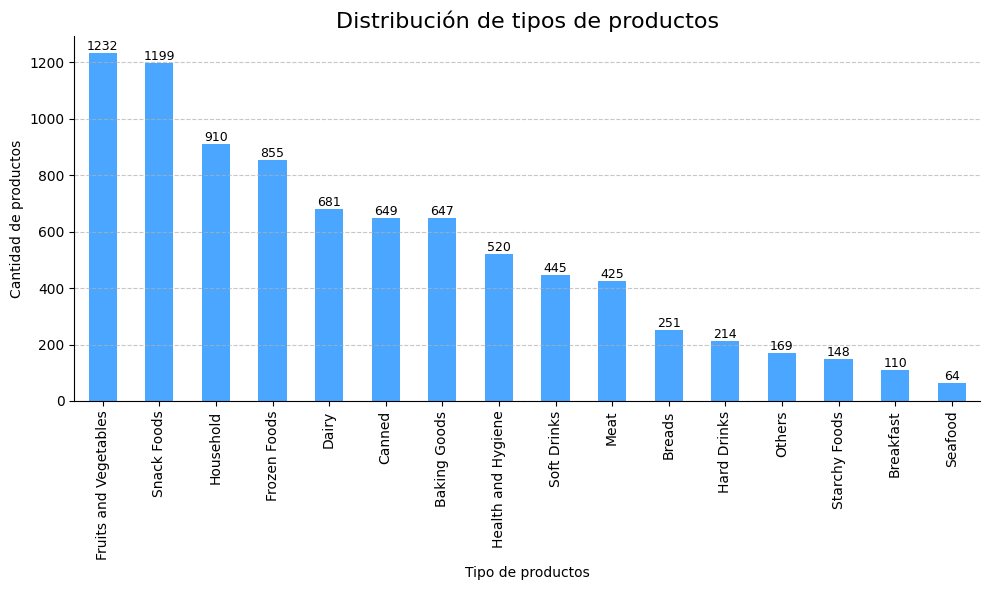

In [ ]:
plt.figure(figsize=(10, 6))
df_tipo_producto.plot(kind='bar', color='dodgerblue',alpha=0.8)
plt.title('Distribución de tipos de productos',fontsize=16)
plt.xlabel('Tipo de productos',fontsize=10)
plt.ylabel('Cantidad de productos',fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, value in enumerate(df_tipo_producto):
    plt.text(i, value, str(value), ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()

De acuerod al gráfico se observa que la mayor cantidad de tipo de producto con frutas y vegetales junto con snacks.

In [ ]:
df_tipo_tamaño=df_new['outlet_size_new'].value_counts()
df_tipo_tamaño

outlet_size_new
Small     4797
Medium    2790
High       932
Name: count, dtype: int64

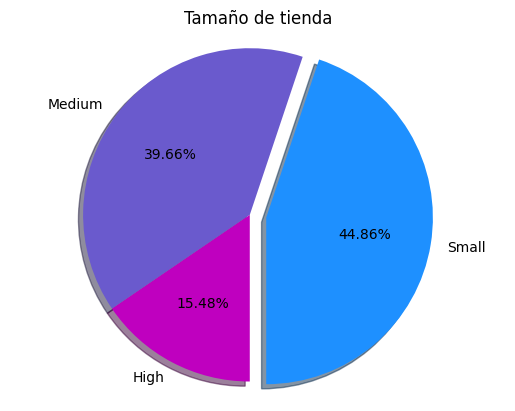

In [ ]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)
size = [2700,2387,932]
etiquetas = [ 'Small','Medium', 'High' ]
explotar = [0.1,0,0]
colors='dodgerblue', 'slateblue', 'm'
ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = True, startangle=-90, colors=colors)
ax1.axis("equal")
ax1.set_title('Tamaño de tienda', fontsize=16, fontweight='bold')
plt.title('Tamaño de tienda')
plt.show()

De acuerdo al gráfico se obserca que el mayor porcentaje de tiendas son de tamaño pequeño.

In [ ]:
df_tipo_tienda=df_new['outlet_type'].value_counts()
df_tipo_tienda

outlet_type
Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: count, dtype: int64

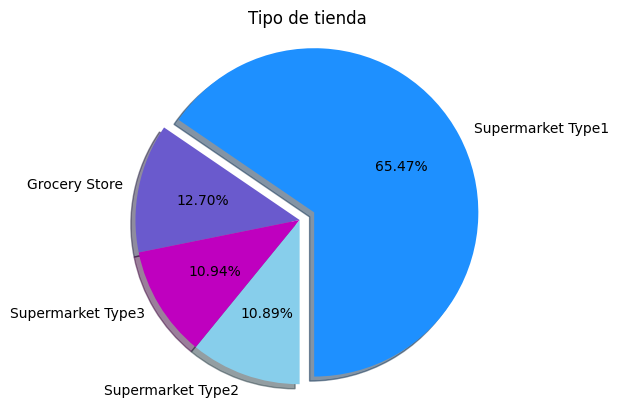

In [ ]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)
size = [ 5577,1082,932,928]
etiquetas = [ 'Supermarket Type1','Grocery Store', 'Supermarket Type3','Supermarket Type2' ]
explotar = [0.1,0,0,0]
colors='dodgerblue', 'slateblue', 'm','Skyblue'
ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = True, startangle=-90, colors=colors)
ax1.axis("equal")
ax1.set_title('Tipo de tienda', fontsize=16, fontweight='bold')
plt.title('Tipo de tienda')
plt.show()

La mayor cantidad de tiendas son del tipo supermarket type 1, representan más del 50%

In [ ]:
df_tipo_tienda_T=df_new['oulet_location_type'].value_counts()
df_tipo_tienda_T

oulet_location_type
Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: count, dtype: int64

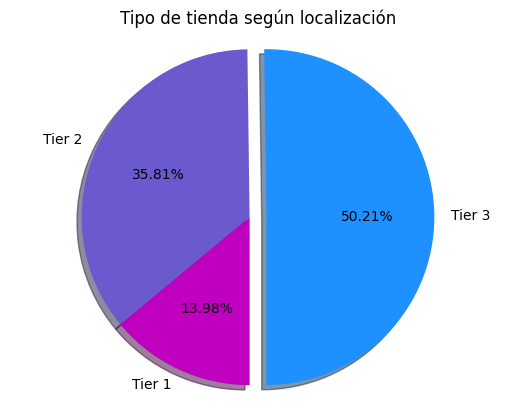

In [ ]:
fig1 = plt.figure(dpi=100)
ax1 = fig1.add_subplot(1,1,1)
size = [ 3347,2387,932]
etiquetas = ['Tier 3', 'Tier 2', 'Tier 1' ]
explotar = [0.1,0,0]
colors='dodgerblue', 'slateblue', 'm'
ax1.pie(size, labels=etiquetas, explode=explotar, autopct="%.2f%%", shadow = True, startangle=-90, colors=colors)
ax1.axis("equal")
ax1.set_title('Tipo de tienda según localización', fontsize=16, fontweight='bold')
plt.title('Tipo de tienda según localización')
plt.show()

El Tier 3 representa el 50% del total.

## Visualización de predicción de ventas por tienda y productos

In [ ]:
df_ventas_tienda=df_new.groupby(['outlet_type'])[['item_outlet_sales']].mean()
df_ventas_tienda

,item_outlet_sales
outlet_type,
Grocery Store,340.031198
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Supermarket Type3,3695.781505


In [ ]:
df_ventas_tienda_ordenado=df_ventas_tienda.sort_values(by='item_outlet_sales',ascending=False)
df_ventas_tienda_ordenado

,item_outlet_sales
outlet_type,
Supermarket Type3,3695.781505
Supermarket Type1,2316.181148
Supermarket Type2,1995.498739
Grocery Store,340.031198


In [ ]:
df_ventas_tienda_ordenado.index

Index(['Supermarket Type3', 'Supermarket Type1', 'Supermarket Type2',
       'Grocery Store'],
      dtype='object', name='outlet_type')

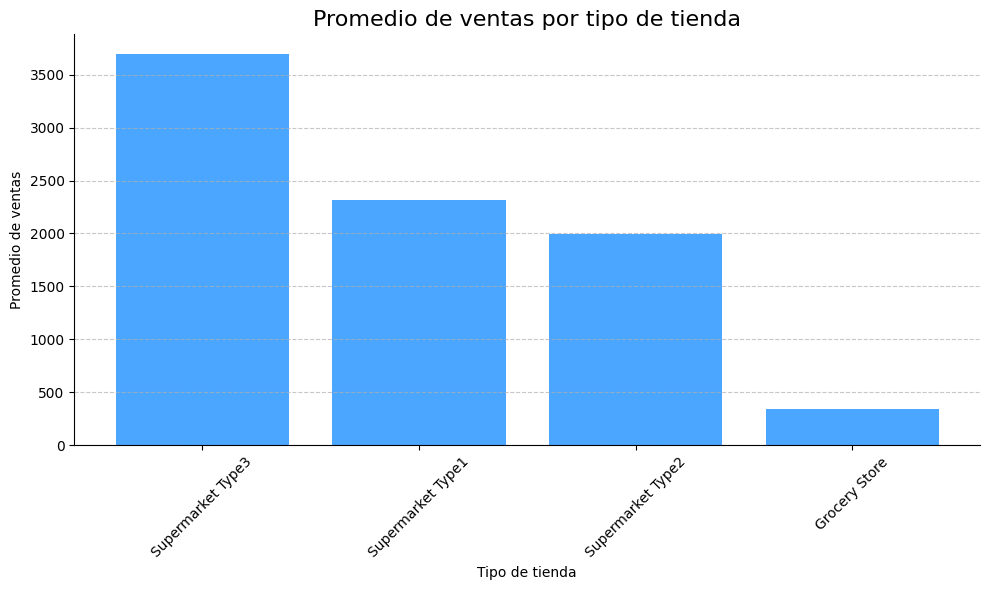

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_ventas_tienda_ordenado.index, df_ventas_tienda_ordenado['item_outlet_sales'].values, color='dodgerblue',alpha=0.8)
plt.title('Promedio de ventas por tipo de tienda',fontsize=16)
plt.xlabel('Tipo de tienda',fontsize=10)
plt.ylabel('Promedio de ventas',fontsize=10)
plt.xticks(rotation=45,fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Se observa que el supermarket 3 tiene el mayor promedio de ventas.

In [ ]:
df_new_sm3 = df_new[df_new["outlet_type"] == "Supermarket Type3"]
df_new_sm3

,item_id,item_w,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,outlet_size,oulet_location_type,outlet_type,item_outlet_sales,item_w_new,outlet_size_new
6,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392,9.300,Medium
10,DRC01,NaN,Regular,0.019107,Soft Drinks,48.4692,OUT027,1985,Medium,Tier 3,Supermarket Type3,1034.6532,5.920,Medium
20,FDN15,NaN,Low Fat,0.016653,Meat,139.5180,OUT027,1985,Medium,Tier 3,Supermarket Type3,2936.1780,17.500,Medium
26,FDX07,NaN,Regular,0.022808,Fruits and Vegetables,183.4950,OUT027,1985,Medium,Tier 3,Supermarket Type3,4577.3750,19.200,Medium
42,FDO10,NaN,Regular,0.012690,Snack Foods,56.4588,OUT027,1985,Medium,Tier 3,Supermarket Type3,973.3996,13.650,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8480,NCD55,NaN,Low Fat,0.024213,Household,42.4454,OUT027,1985,Medium,Tier 3,Supermarket Type3,293.6178,14.000,Medium
8499,FDH31,NaN,Regular,0.020312,Meat,98.1042,OUT027,1985,Medium,Tier 3,Supermarket Type3,2777.7176,12.000,Medium
8504,FDX13,NaN,Low Fat,0.047552,Canned,249.1092,OUT027,1985,Medium,Tier 3,Supermarket Type3,8217.3036,7.725,Medium
8513,FDD28,NaN,Low Fat,0.053039,Frozen Foods,59.5904,OUT027,1985,Medium,Tier 3,Supermarket Type3,1640.5312,10.695,Medium


In [ ]:
df_5=df_new_sm3.groupby(['item_type'])[['item_outlet_sales']].mean()
df_5

,item_outlet_sales
item_type,
Baking Goods,3248.872417
Breads,3565.122748
Breakfast,4584.759327
Canned,3779.866814
Dairy,3922.177361
Frozen Foods,3576.163118
Fruits and Vegetables,4114.487061
Hard Drinks,3432.951643
Health and Hygiene,3318.069783


In [ ]:
df_6=df_5.sort_values(by='item_outlet_sales',ascending=False)
df_6

,item_outlet_sales
item_type,
Breakfast,4584.759327
Fruits and Vegetables,4114.487061
Dairy,3922.177361
Meat,3862.293911
Household,3821.207782
Canned,3779.866814
Snack Foods,3740.102126
Frozen Foods,3576.163118
Breads,3565.122748


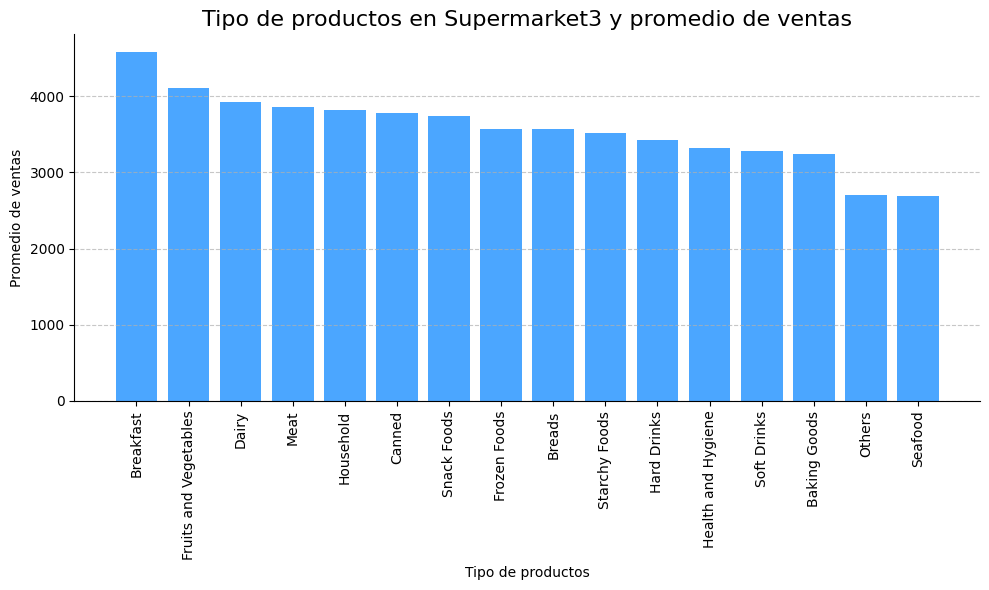

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(df_6.index, df_6['item_outlet_sales'].values, color='dodgerblue',alpha=0.8)
plt.title('Tipo de productos en Supermarket3 y promedio de ventas',fontsize=16)
plt.xlabel('Tipo de productos',fontsize=10)
plt.ylabel('Promedio de ventas',fontsize=10)
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=10)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Si osbervamos dentro del Supermarket 3, el producto que tiene un mejor promedio de ventas es 'Breakfast'.

#Prepreocesamiento de la data

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8519 non-null   object 
 1   item_w                 7060 non-null   float64
 2   item_fat               8519 non-null   object 
 3   item_visib             8519 non-null   float64
 4   item_type              8519 non-null   object 
 5   intem_mrp              8519 non-null   float64
 6   outlet_id              8519 non-null   object 
 7   outlet_establish_year  8519 non-null   int64  
 8   outlet_size            6109 non-null   object 
 9   oulet_location_type    8519 non-null   object 
 10  outlet_type            8519 non-null   object 
 11  item_outlet_sales      8519 non-null   float64
 12  item_w_new             8519 non-null   float64
 13  outlet_size_new        8519 non-null   object 
dtypes: float64(5), int64(1), object(8)
memory usage: 1.2+ MB


In [ ]:
df_new.drop(['item_w','outlet_size'], axis=1 , inplace=True)

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8519 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   item_id                8519 non-null   object 
 1   item_fat               8519 non-null   object 
 2   item_visib             8519 non-null   float64
 3   item_type              8519 non-null   object 
 4   intem_mrp              8519 non-null   float64
 5   outlet_id              8519 non-null   object 
 6   outlet_establish_year  8519 non-null   int64  
 7   oulet_location_type    8519 non-null   object 
 8   outlet_type            8519 non-null   object 
 9   item_outlet_sales      8519 non-null   float64
 10  item_w_new             8519 non-null   float64
 11  outlet_size_new        8519 non-null   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 1.1+ MB


In [ ]:
df_new.head()

,item_id,item_fat,item_visib,item_type,intem_mrp,outlet_id,outlet_establish_year,oulet_location_type,outlet_type,item_outlet_sales,item_w_new,outlet_size_new
0,FDA15,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Tier 1,Supermarket Type1,3735.1380,9.3,Medium
1,FDA15,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,Tier 2,Supermarket Type1,5976.2208,9.3,Small
2,FDA15,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Tier 2,Supermarket Type1,6474.2392,9.3,Small
3,FDA15,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Tier 3,Supermarket Type2,5976.2208,9.3,Medium
4,FDA15,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,Tier 3,Grocery Store,498.0184,9.3,Small


Variable categóricas

In [ ]:
df_new['outlet_size_new'].value_counts()

outlet_size_new
Small     4797
Medium    2790
High       932
Name: count, dtype: int64

In [ ]:
df_new['item_fat'].value_counts()

item_fat
Low Fat    5516
Regular    3003
Name: count, dtype: int64

In [ ]:
df_new['item_type'].value_counts()

item_type
Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
df_new['oulet_location_type'].value_counts()

oulet_location_type
Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: count, dtype: int64

In [ ]:
df_new['outlet_type'].value_counts()

outlet_type
Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
df_new['outlet_id'].value_counts()

outlet_id
OUT013    932
OUT027    932
OUT049    930
OUT035    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    527
Name: count, dtype: int64

In [ ]:
df_new.drop(['item_id'], axis=1, inplace=True)

In [ ]:
X=df_new.drop(columns=["item_outlet_sales"])
y=df_new["item_outlet_sales"]

In [ ]:
X.shape


(8519, 10)

In [ ]:
y.shape

(8519,)

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')


one_hot_encoder = OneHotEncoder()
standard_scaler = StandardScaler()
imputer_cat = SimpleImputer(strategy="most_frequent")
imputer_num = SimpleImputer(strategy="mean")





In [ ]:
col_transformer = make_column_transformer((make_pipeline(imputer_num,standard_scaler), num_selector),
                                          (make_pipeline(imputer_cat,one_hot_encoder), cat_selector),

                        remainder = 'passthrough')

col_transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dea0adedf60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dea0adef160>)])

In [ ]:
col_transformer.fit(X)

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dea0adedf60>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7dea0adef160>)])

In [ ]:
aux=col_transformer.transform(X)
X_procesado=pd.DataFrame(aux.toarray(),columns=col_transformer.get_feature_names_out())
X_procesado.info()
X_procesado

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8519 entries, 0 to 8518
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   pipeline-1__item_visib                       8519 non-null   float64
 1   pipeline-1__intem_mrp                        8519 non-null   float64
 2   pipeline-1__outlet_establish_year            8519 non-null   float64
 3   pipeline-1__item_w_new                       8519 non-null   float64
 4   pipeline-2__item_fat_Low Fat                 8519 non-null   float64
 5   pipeline-2__item_fat_Regular                 8519 non-null   float64
 6   pipeline-2__item_type_Baking Goods           8519 non-null   float64
 7   pipeline-2__item_type_Breads                 8519 non-null   float64
 8   pipeline-2__item_type_Breakfast              8519 non-null   float64
 9   pipeline-2__item_type_Canned                 8519 non-null   float64
 10  

,pipeline-1__item_visib,pipeline-1__intem_mrp,pipeline-1__outlet_establish_year,pipeline-1__item_w_new,pipeline-2__item_fat_Low Fat,pipeline-2__item_fat_Regular,pipeline-2__item_type_Baking Goods,pipeline-2__item_type_Breads,pipeline-2__item_type_Breakfast,pipeline-2__item_type_Canned,...,pipeline-2__oulet_location_type_Tier 1,pipeline-2__oulet_location_type_Tier 2,pipeline-2__oulet_location_type_Tier 3,pipeline-2__outlet_type_Grocery Store,pipeline-2__outlet_type_Supermarket Type1,pipeline-2__outlet_type_Supermarket Type2,pipeline-2__outlet_type_Supermarket Type3,pipeline-2__outlet_size_new_High,pipeline-2__outlet_size_new_Medium,pipeline-2__outlet_size_new_Small
0,-0.970582,1.746938,0.138865,-0.769598,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,-0.970435,1.753360,0.497347,-0.769598,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,-0.971123,1.726064,0.736336,-0.769598,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.969799,1.743727,1.333806,-0.769598,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-0.761773,1.732487,0.019371,-0.769598,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8514,-0.861649,-1.728046,-0.100123,-1.334622,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8515,-1.067032,1.876787,1.094818,-1.649959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8516,-1.068279,1.904083,0.736336,-1.649959,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8517,1.593378,-0.523703,0.138865,1.587356,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


#Modelo de Regresión Lineal

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_procesado, y, test_size=0.3)

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
lin_reg.score(X_train, y_train)

0.5610081104952431

In [ ]:
lin_reg.score(X_test,y_test)

0.5686725852024832

Se observa el porcentaje de precisión del modelo es bastante bajo

<Axes: >

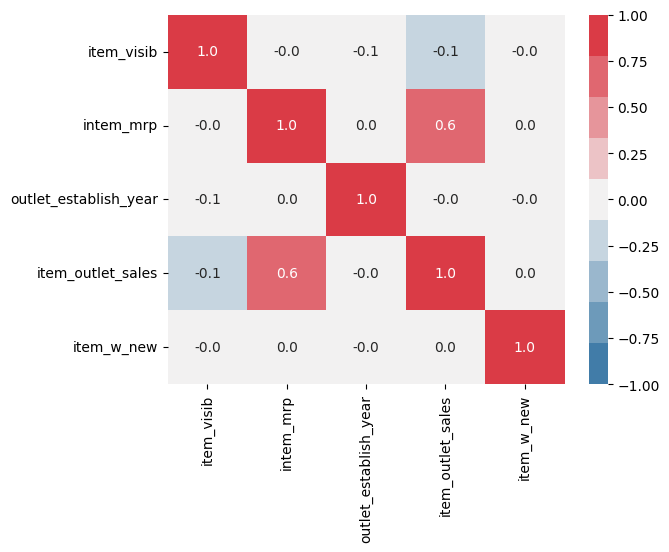

In [ ]:
import pandas as pd
import seaborn as sns


numeric_cols = df_new.select_dtypes(include=['number','float'])


correlation_matrix = numeric_cols.corr()


sns.heatmap(correlation_matrix, cmap=sns.diverging_palette(240, 10, n=9), annot=True, fmt='.1f', vmin=-1, vmax=1)

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=9)
knn_regressor.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=9)

In [ ]:
knn_regressor.score(X_train, y_train)

0.626774660431118

In [ ]:
knn_regressor.score(X_test, y_test)

0.540674740535658

Conclusiones:
1. El modelo de regresión lineal tienen un porcentaje de precisión bastante bajo, con un 56% de predicción.
2. La característica que tiene mayor correlación con el precio de ventas es el precio minorista del producto.
3. Se puede mejorar disminuyendo las características que no tienen correlación.
4. Incluir otros modelos mejorados para el análisis